In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import SMOTE


pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [33]:
df = pd.read_csv("hr_data.csv")

In [34]:
df.head()

,SLNO,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79000,13.16000,42.86000,No,No,Female,Agency,7,ERS,Noida,34.00000,Joined
1,2,2112635,No,18,30,E2,50.00000,320.00000,180.00000,No,No,Male,Employee Referral,8,INFRA,Chennai,34.00000,Joined
2,3,2112838,No,3,45,E2,42.84000,42.84000,0.00000,No,No,Male,Agency,4,INFRA,Noida,27.00000,Joined
3,4,2115021,No,26,30,E2,42.84000,42.84000,0.00000,No,No,Male,Employee Referral,4,INFRA,Noida,34.00000,Joined
4,5,2115125,Yes,1,120,E2,42.59000,42.59000,0.00000,No,Yes,Male,Employee Referral,6,INFRA,Noida,34.00000,Joined


In [35]:
df.shape

(8995, 18)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SLNO                         8995 non-null   int64  
 1   Candidate Ref                8995 non-null   int64  
 2   DOJ Extended                 8995 non-null   object 
 3   Duration to accept offer     8995 non-null   int64  
 4   Notice period                8995 non-null   int64  
 5   Offered band                 8982 non-null   object 
 6   Pecent hike expected in CTC  8995 non-null   float64
 7   Percent hike offered in CTC  8995 non-null   float64
 8   Percent difference CTC       8995 non-null   float64
 9   Joining Bonus                8995 non-null   object 
 10  Candidate relocate actual    8995 non-null   object 
 11  Gender                       8995 non-null   object 
 12  Candidate Source             8995 non-null   object 
 13  Rex in Yrs        

## 1. Identify and define the problem statement clearly also mention why it is necessary for an organisation to solve the problem.

In [37]:
round(df.Status.value_counts()/df.shape[0]*100,2)

Joined       81.30000
Not Joined   18.70000
Name: Status, dtype: float64

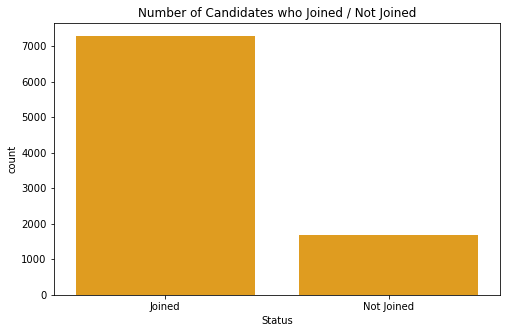

In [295]:
plt.figure(figsize = (8,5));
sns.countplot(df.Status, color='Orange')
plt.title('Number of Candidates who Joined / Not Joined')
plt.show()

### The Problem Statement for this Case Study is:
* Based on the Case Study description, 30% of the candidates who accept the job offer do not join the company.
* When we check the Target column of our data, it is found that about 19% of candidates who accepted the job offer did not join the company.
* This leads to a huge loss of time and money as HRWorks would get a commission from partner companies only after the successful onboarding of candidates.
* This may be the reason that many companies require the candidates to fill the legal bond before joining the company so that candidates do not leave the company before the bond period, else, legal actions can be taken.
* A solution needs to be found to minimize these losses as the losses may increase with the increase in candidates.
* This can be done by primarily classifying the candidates based on their likelihood of joining using Machine Learning Classification Algorithms.
* This will help HRWorks to prioritize candidates who are more likely to join the company. 

## 2. Define any hypothesis if possible.

* Based on the data give, A hypothesis test can be done to check if Gender and Location variables are dependent or independent of each other. Thus,
    H0: Gender and Location Features are independent
    H1: There is a dependency between Genger and Location Features
    
* We can apply Chi-Squared Test to check if the Null Hypothesis is true or not.
* If p-value > 0.05, we will accept Null Hypothesis is True and Gender and Location Features are independent 
* Else, we failed to reject Null Hypothesis and accept that there is a dependency between Gender and Location Features.

## 3. Do the EDA of dataset and write the observation you got form the dataset?

### Checking for NaN Values

In [40]:
df.isna().sum()

SLNO                            0
Candidate Ref                   0
DOJ Extended                    0
Duration to accept offer        0
Notice period                   0
Offered band                   13
Pecent hike expected in CTC     0
Percent hike offered in CTC     0
Percent difference CTC          0
Joining Bonus                   0
Candidate relocate actual       0
Gender                          0
Candidate Source                0
Rex in Yrs                      0
LOB                             0
Location                        0
Age                            15
Status                          0
dtype: int64

In [41]:
df.dropna(inplace = True)

A total of 28 rows are having NaN values which is very less in comparision to dataset. **THUS, REMOVING IT**

### Checking for Duplicate Rows

In [44]:
df.duplicated().sum()

0

**No Duplicated Rows Found**

### Statistical Summary of Numeric Features

In [208]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SLNO,8968.00000,5987.29996,3365.83981,1.00000,3229.75000,5993.50000,8750.25000,12333.00000
Candidate Ref,8968.00000,2844899.98941,485925.75349,2109586.00000,2386855.00000,2807607.50000,3300084.50000,3836076.00000
Duration to accept offer,8968.00000,21.42451,25.80554,0.00000,3.00000,10.00000,33.00000,224.00000
Notice period,8968.00000,39.30475,22.20388,0.00000,30.00000,30.00000,60.00000,120.00000
Pecent hike expected in CTC,8968.00000,43.92065,29.77074,-68.83000,27.30000,40.00000,53.85000,359.77000
Percent hike offered in CTC,8968.00000,40.67935,35.99452,-60.53000,22.22000,36.00000,50.00000,471.43000
Percent difference CTC,8968.00000,-1.60017,19.53567,-67.27000,-8.36750,0.00000,0.00000,300.00000
Rex in Yrs,8968.00000,4.23640,2.54608,0.00000,3.00000,4.00000,6.00000,24.00000
Age,8968.00000,29.91269,4.09724,20.00000,27.00000,29.00000,34.00000,60.00000


### Statistical Summary of Categorical Features

In [46]:
df.describe(include = 'object').T

,count,unique,top,freq
DOJ Extended,8968,2,No,4775
Offered band,8968,4,E1,5558
Joining Bonus,8968,2,No,8552
Candidate relocate actual,8968,2,No,7682
Gender,8968,2,Male,7420
Candidate Source,8968,3,Direct,4791
LOB,8968,9,INFRA,2832
Location,8968,11,Chennai,3146
Status,8968,2,Joined,7290


### Primary Observations From Statistical Summary

* Duration to accept offer has a maximum value of 224 days and a median of 30 days. This looks absurd as no company gives about 8 months to make the decision
* This dataset has inexperienced to highly experienced candidates having experience of up to 24 years.
* We also have younger to old candidates up to 60 years of age group as well
* A candidate got a Percent hike in CTC of exceptional 471% which is more than 100% of what was expected. 
* Most of the candidates were having job offers in Chennai
* Almost all of the candidates were not given a Joining bonus
* Most of the candidates are Males
* About 81% of the candidates in this dataset have joined the company.

### Univariate Analysis

#### Defining Functions for Univariate Analysis

###### Count Plot Function

In [401]:
def countp(x):
    plt.figure(figsize = (8,6))
    sns.countplot(x = x, data = df, palette='YlOrRd')

##### Count Function

In [311]:
def count(col):
    return df[col].value_counts()

##### Count Plot Function with hue as Target Variable for Bivariate Analysis

In [403]:
def countp_y(x):
    plt.figure(figsize = (8,6))
    sns.countplot(x = x, data = df, hue = 'Status', palette = 'Oranges_r')

##### Count with each class of Target Variable

In [315]:
def count_y(x):
    return df.groupby([x, 'Status'])[x].count()

### Analysis of 'Status'

Joined        7290
Not Joined    1678
Name: Status, dtype: int64


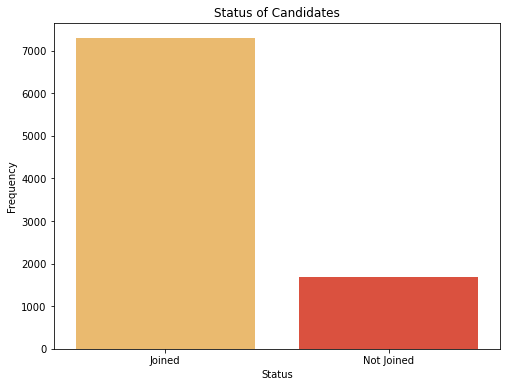

In [402]:
print(count('Status'))


countp('Status')
plt.xlabel("Status")
plt.ylabel("Frequency")
plt.title("Status of Candidates")
plt.show()

* Majority of the candidates from this data have joined the company which is a good sign.
* This also leads to imbalance data which needs to be treated to avoid model producing biased results

### Analysis of 'Gender'

Male      7420
Female    1548
Name: Gender, dtype: int64


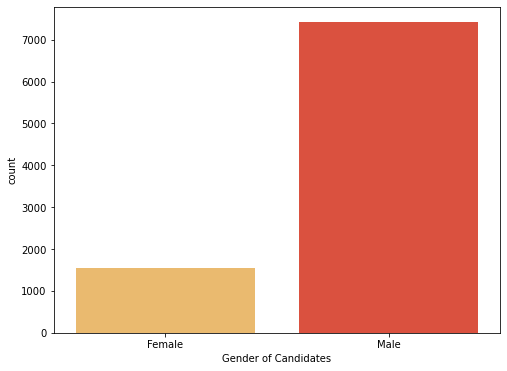

In [404]:
print(count('Gender'))

countp('Gender')
plt.xlabel("Gender of Candidates")
plt.show()

Gender  Status    
Female  Joined        1275
        Not Joined     273
Male    Joined        6015
        Not Joined    1405
Name: Gender, dtype: int64


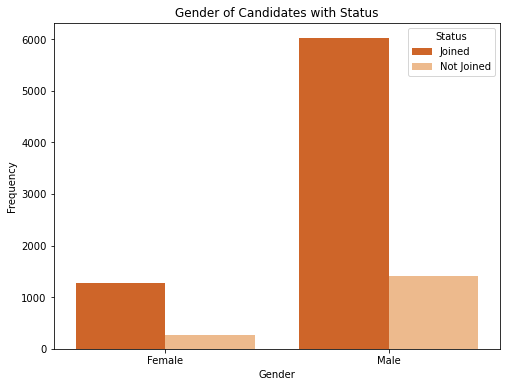

In [405]:
print(count_y('Gender'))

countp_y('Gender')
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.title("Gender of Candidates with Status")
plt.show()

* Most of the candidates are Male and that is why more number of candidates who didn't join are Males

### Analysis of 'Location'

Chennai      3146
Noida        2714
Bangalore    2224
Hyderabad     341
Mumbai        197
Gurgaon       144
Kolkata       128
Pune           48
Others         13
Cochin          7
Ahmedabad       6
Name: Location, dtype: int64


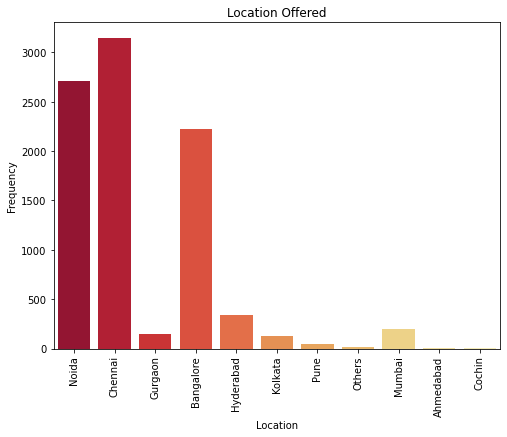

In [406]:
print(count('Location'))

plt.figure(figsize = (8,6))
sns.countplot(x = 'Location', data = df, palette='YlOrRd_r')
plt.xticks(rotation = 90)
plt.xlabel("Location")
plt.ylabel("Frequency")
plt.title("Location Offered")
plt.show()

Location   Status    
Ahmedabad  Joined           5
           Not Joined       1
Bangalore  Joined        1737
           Not Joined     487
Chennai    Joined        2483
           Not Joined     663
Cochin     Joined           7
Gurgaon    Joined         116
           Not Joined      28
Hyderabad  Joined         266
           Not Joined      75
Kolkata    Joined          99
           Not Joined      29
Mumbai     Joined         176
           Not Joined      21
Noida      Joined        2350
           Not Joined     364
Others     Joined          13
Pune       Joined          38
           Not Joined      10
Name: Location, dtype: int64


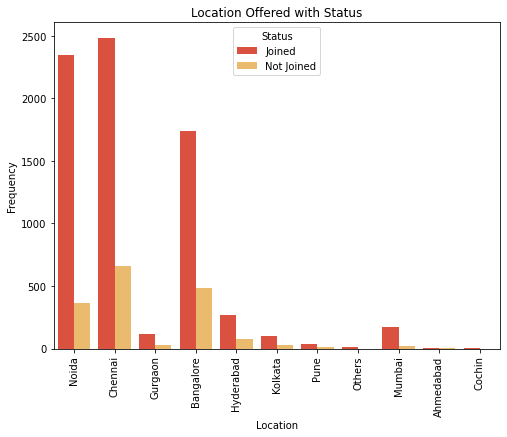

In [407]:
print(count_y('Location'))

plt.figure(figsize = (8,6))
sns.countplot(x = 'Location', data = df, palette='YlOrRd_r', hue = 'Status')
plt.xticks(rotation = 90)
plt.xlabel("Location")
plt.ylabel("Frequency")
plt.title("Location Offered with Status")
plt.show()

* Chennai, Bangalore and Noida have maximum candidates in comparison to other cities.
* Reason behind this is these cities are hubs of several top firms in India
* Bangalore having less number of candidates than Noida has more candidates who didn't join the companies.
* This suggests that these candidates must be getting better options as Bangalore houses many firms offices.

### Analysis of 'Joining Bonus'	

No     8552
Yes     416
Name: Joining Bonus, dtype: int64


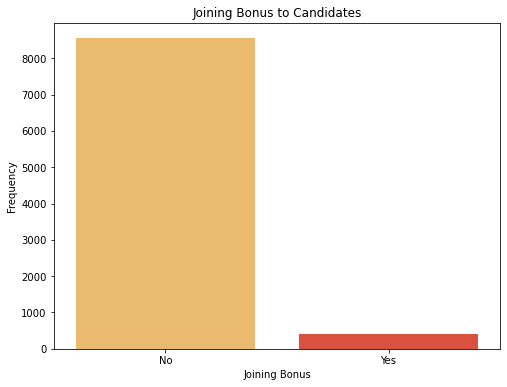

In [408]:
print(count('Joining Bonus'))

countp('Joining Bonus')
plt.xlabel("Joining Bonus")
plt.ylabel("Frequency")
plt.title("Joining Bonus to Candidates")
plt.show()

Joining Bonus  Status    
No             Joined        6955
               Not Joined    1597
Yes            Joined         335
               Not Joined      81
Name: Joining Bonus, dtype: int64


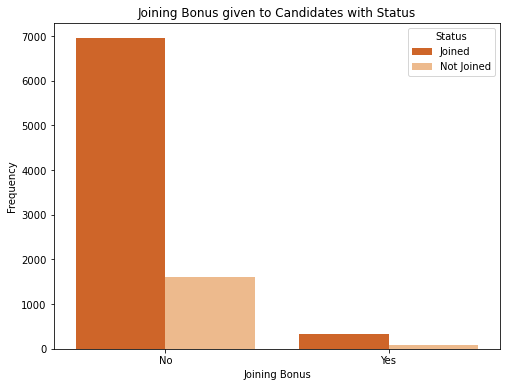

In [410]:
print(count_y('Joining Bonus'))

countp_y('Joining Bonus')
plt.xlabel("Joining Bonus")
plt.ylabel("Frequency")
plt.title("Joining Bonus given to Candidates with Status")
plt.show()

* Almost all of the candidates were not offered any Joining Bonus.
* But we still have candidates who got joining bonus but still didn't joined the company.

### Analysis of 'DOJ Extended'

No     4775
Yes    4193
Name: DOJ Extended, dtype: int64


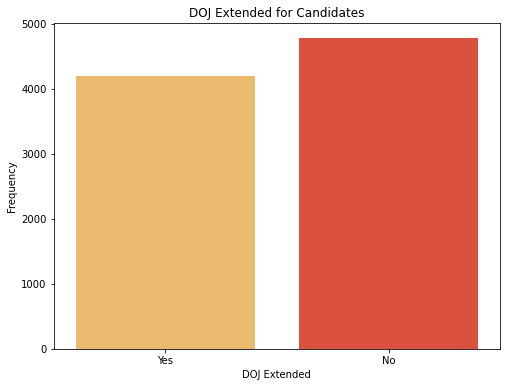

In [411]:
print(count('DOJ Extended'))

countp('DOJ Extended')
plt.xlabel("DOJ Extended")
plt.ylabel("Frequency")
plt.title("DOJ Extended for Candidates")
plt.show()

DOJ Extended  Status    
No            Joined        3871
              Not Joined     904
Yes           Joined        3419
              Not Joined     774
Name: DOJ Extended, dtype: int64


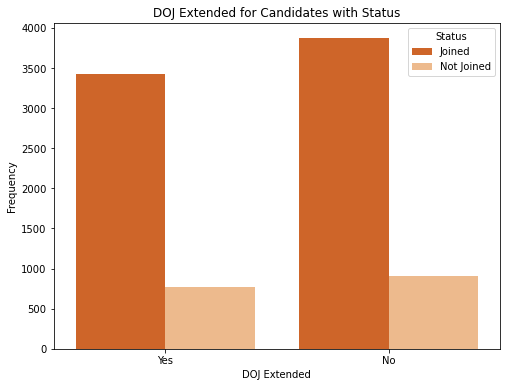

In [412]:
print(count_y('DOJ Extended'))

countp_y('DOJ Extended')
plt.xlabel("DOJ Extended")
plt.ylabel("Frequency")
plt.title("DOJ Extended for Candidates with Status")
plt.show()

* Almost 50% of the candidates were offered to extend the Date of Joining
* While the other half were not offered the same
* The Joined and Not Joined ratio is the same in both the cases is not distinguishable

### Analysis of 'Offered band'

E1    5558
E2    2698
E3     501
E0     211
Name: Offered band, dtype: int64


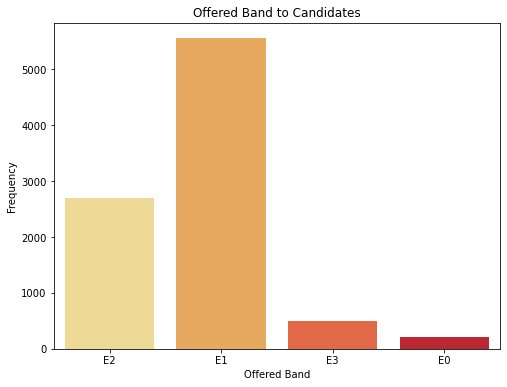

In [413]:
print(count('Offered band'))

countp('Offered band')
plt.xlabel("Offered Band")
plt.ylabel("Frequency")
plt.title("Offered Band to Candidates")
plt.show()

Offered band  Status    
E0            Joined         161
              Not Joined      50
E1            Joined        4519
              Not Joined    1039
E2            Joined        2183
              Not Joined     515
E3            Joined         427
              Not Joined      74
Name: Offered band, dtype: int64


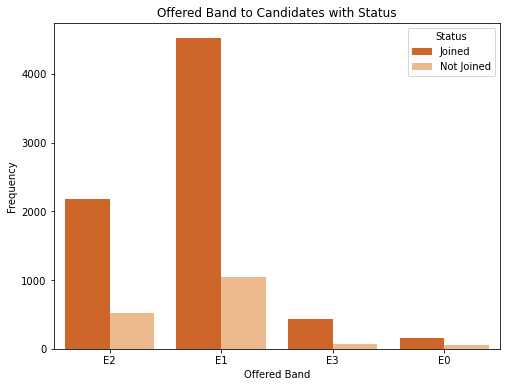

In [414]:
print(count_y('Offered band'))

countp_y('Offered band')
plt.xlabel("Offered Band")
plt.ylabel("Frequency")
plt.title("Offered Band to Candidates with Status")
plt.show()

* Most of the candidates were offered E1 band followed by E2 and E3 and E4.
* Since, most of them were offered E1, thus most of the candidates who did not join are also from E1
* Thus, we can say that most of the candidates are freshers or having low experience level. 

### Analysis of 'LOB'

INFRA         2832
ERS           2424
BFSI          1395
ETS            690
CSMP           575
AXON           567
EAS            346
Healthcare     124
MMS             15
Name: LOB, dtype: int64


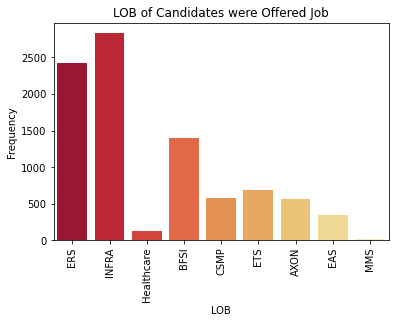

In [415]:
print(count('LOB'))

sns.countplot(x = 'LOB', data = df, palette='YlOrRd_r')
plt.xticks(rotation = 90)
plt.xlabel("Line Of Business")
plt.ylabel("Frequency")
plt.title("LOB of Candidates were Offered Job")
plt.show()

LOB         Status    
AXON        Joined         439
            Not Joined     128
BFSI        Joined        1058
            Not Joined     337
CSMP        Joined         468
            Not Joined     107
EAS         Joined         254
            Not Joined      92
ERS         Joined        1895
            Not Joined     529
ETS         Joined         573
            Not Joined     117
Healthcare  Joined         102
            Not Joined      22
INFRA       Joined        2486
            Not Joined     346
MMS         Joined          15
Name: LOB, dtype: int64


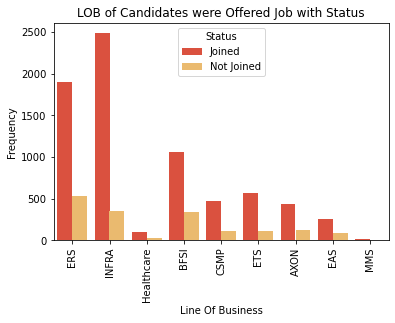

In [416]:
print(count_y('LOB'))

sns.countplot(x = 'LOB', data = df, palette='YlOrRd_r', hue = 'Status')
plt.xticks(rotation = 90)
plt.xlabel("Line Of Business")
plt.ylabel("Frequency")
plt.title("LOB of Candidates were Offered Job with Status")
plt.show()

* Most of the candidates were offered jobs in the Infrastructure Line of Business
* Then comes ERS followed by BFSI
* Infra has twice more candidates than BFSI who joined but has almost equal numbers who did not join
* This suggests that candidates are more likely to not join a BFSI firm.

#### Analysis of Candidate Source

Direct               4791
Agency               2579
Employee Referral    1598
Name: Candidate Source, dtype: int64


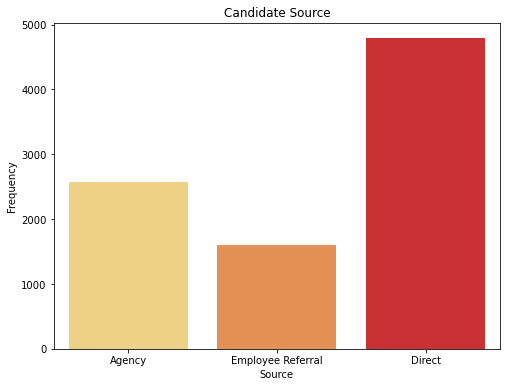

In [417]:
print(count('Candidate Source'))

countp('Candidate Source')
plt.xlabel("Source")
plt.ylabel("Frequency")
plt.title("Candidate Source")
plt.show()

Candidate Source   Status    
Agency             Joined        1956
                   Not Joined     623
Direct             Joined        3929
                   Not Joined     862
Employee Referral  Joined        1405
                   Not Joined     193
Name: Candidate Source, dtype: int64


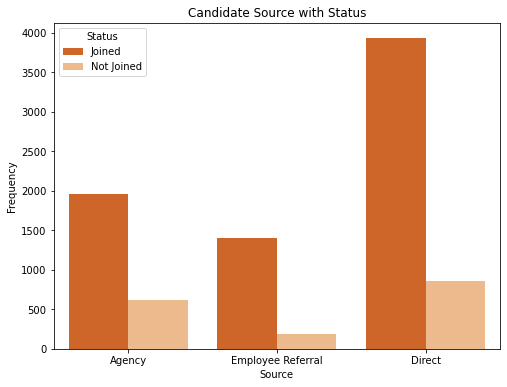

In [418]:
print(count_y('Candidate Source'))

countp_y('Candidate Source')
plt.xlabel("Source")
plt.ylabel("Frequency")
plt.title("Candidate Source with Status")
plt.show()

* Most of the candidates onboarded Directly by the firms
* Number of candidates who did not join the company from the Direct channel is almost equal to those from Agency Channel even though candidates onboarded through Agency Channel is less
* A reason behind this is, while applying through an agency, one gets multiple options of companies to apply, thus selecting the one that gives the best benefits
* While a candidate onboarded directly has fewer or no options at the moment thus having less number who did not join.

### Analysis of 'Candidate relocate actual'

No     7682
Yes    1286
Name: Candidate relocate actual, dtype: int64


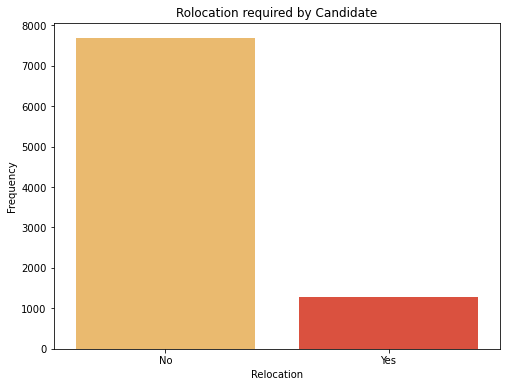

In [419]:
print(count('Candidate relocate actual'))

countp('Candidate relocate actual')
plt.xlabel("Relocation")
plt.ylabel("Frequency")
plt.title("Rolocation required by Candidate")
plt.show()

Candidate relocate actual  Status    
No                         Joined        6004
                           Not Joined    1678
Yes                        Joined        1286
Name: Candidate relocate actual, dtype: int64


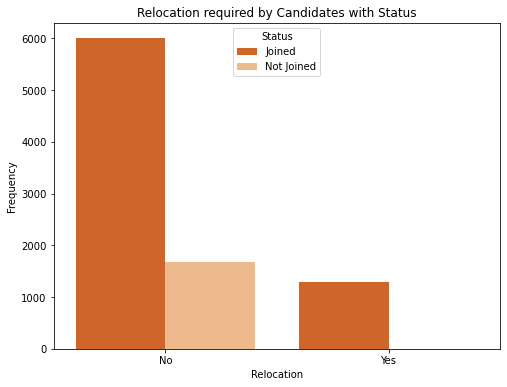

In [420]:
print(count_y('Candidate relocate actual'))

countp_y('Candidate relocate actual')
plt.xlabel("Relocation")
plt.ylabel("Frequency")
plt.title("Relocation required by Candidates with Status")
plt.show()

* Most of the candidates were not required to relocate
* The ones who were required to relocate, all of them joined which suggests they are in need of job and money are ready to work from anywhere

### Analysis of Numeric Columns

In [335]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SLNO,8968.00000,5987.29996,3365.83981,1.00000,3229.75000,5993.50000,8750.25000,12333.00000
Candidate Ref,8968.00000,2844899.98941,485925.75349,2109586.00000,2386855.00000,2807607.50000,3300084.50000,3836076.00000
Duration to accept offer,8968.00000,21.42451,25.80554,0.00000,3.00000,10.00000,33.00000,224.00000
Notice period,8968.00000,39.30475,22.20388,0.00000,30.00000,30.00000,60.00000,120.00000
Pecent hike expected in CTC,8968.00000,43.92065,29.77074,-68.83000,27.30000,40.00000,53.85000,359.77000
Percent hike offered in CTC,8968.00000,40.67935,35.99452,-60.53000,22.22000,36.00000,50.00000,471.43000
Percent difference CTC,8968.00000,-1.60017,19.53567,-67.27000,-8.36750,0.00000,0.00000,300.00000
Rex in Yrs,8968.00000,4.23640,2.54608,0.00000,3.00000,4.00000,6.00000,24.00000
Age,8968.00000,29.91269,4.09724,20.00000,27.00000,29.00000,34.00000,60.00000


#### Functions for Univariate and Bivariate Analysis of Numeric Features

##### Function for Dist Plot

In [421]:
def dist(data, x):
    plt.figure(figsize = (8,6))
    sns.distplot(data[x], bins = 10, color = 'orange')

##### Function for Box Plot of Classes of Target Variable 'Status'

In [2]:
def box(x):
    plt.figure(figsize = (8,6))
    sns.boxplot(x = 'Status', y = x, data = df, palette = 'autumn')

### Analysis of 'Age'

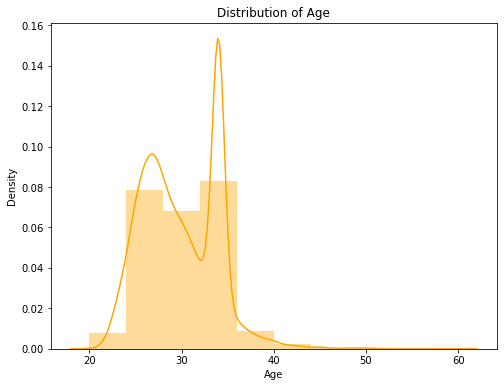

In [422]:
dist(df, 'Age')
plt.xlabel("Age")
plt.title("Distribution of Age")
plt.show()

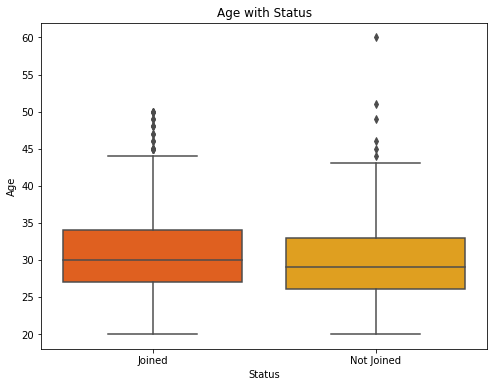

In [428]:
box('Age')
plt.xlabel("Status")
plt.title("Age with Status")
plt.show()

* Most of the candidates were of age 22 years to 35 years
* We have few outliers of candidates ageing up to 60 years old
* It can be observed that the 60 years old candidate did not join
* It may seem like an error in input as generally people get retired at the age of 60 
* Both Joined and Not Joined classes have equal number of outliers (aged candidates)

### Analysis of 'Pecent hike expected in CTC'

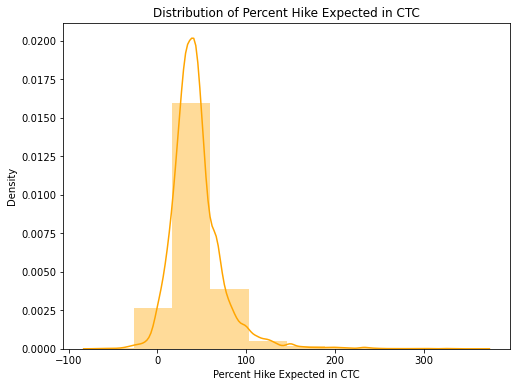

In [426]:
dist(df, 'Pecent hike expected in CTC')
plt.xlabel("Percent Hike Expected in CTC")
plt.title("Distribution of Percent Hike Expected in CTC")
plt.show()

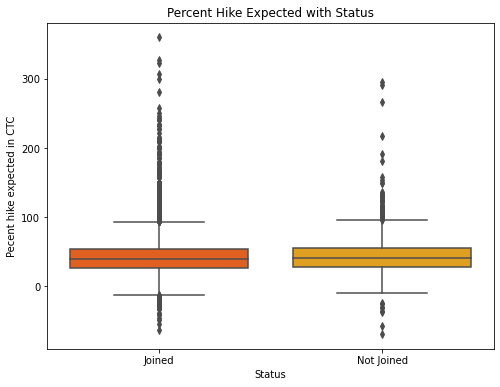

In [427]:
box('Pecent hike expected in CTC')
plt.xlabel("Status")
plt.title("Percent Hike Expected with Status")
plt.show()

* Most of the candidates were expecting per cent hike in CTC of about 50%
* A few candidates were expecting a per cent hike more than 300%
* But we cannot comment on this, as they might have changed the position or department or had been assigned a managerial post

### Analysis of 'Pecent hike offered in CTC'

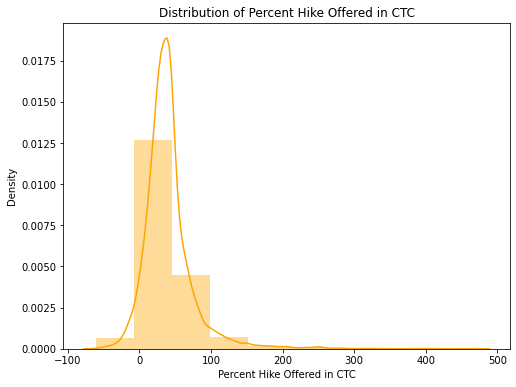

In [429]:
dist(df, 'Percent hike offered in CTC')
plt.xlabel("Percent Hike Offered in CTC")
plt.title("Distribution of Percent Hike Offered in CTC")
plt.show()

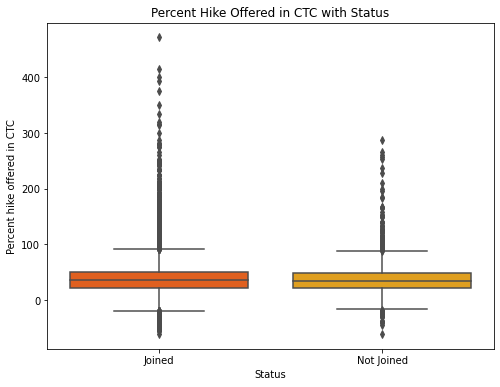

In [430]:
box('Percent hike offered in CTC')
plt.xlabel("Status")
plt.title("Percent Hike Offered in CTC with Status")
plt.show()

* Looks like what candidates were expecting got a little less of per cent hike 
* This makes sense as candidates always aspire more than the calibre
* We have few candidates who were offered a high per cent hike in CTC which can be related to those candidates who were expecting these hikes
* This strongly suggests that these set of candidates had applied for a managerial level or equivalent positions

### Analysis of 'Pecent difference CTC'

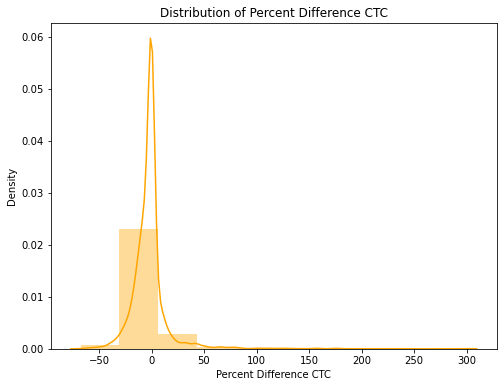

In [431]:
dist(df, 'Percent difference CTC')
plt.xlabel("Percent Difference CTC")
plt.title("Distribution of Percent Difference CTC")
plt.show()

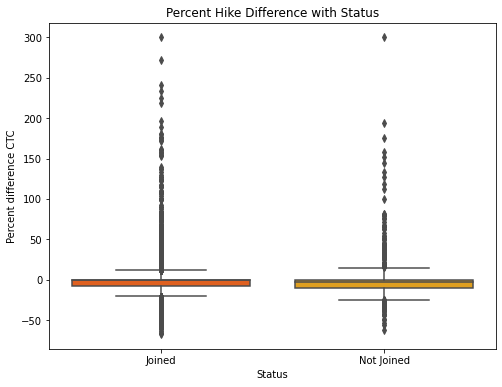

In [432]:
box('Percent difference CTC')
plt.xlabel("Status")
plt.title("Percent Hike Difference with Status")
plt.show()

* Percent difference CTC can produce same observations as those from Percent hike expected and Percent hike offered features
* A lot of Percent difference in this feature is incorrect, thus we will remove them in Outlier Analysis

### Analysis of 'Rex in Yrs'

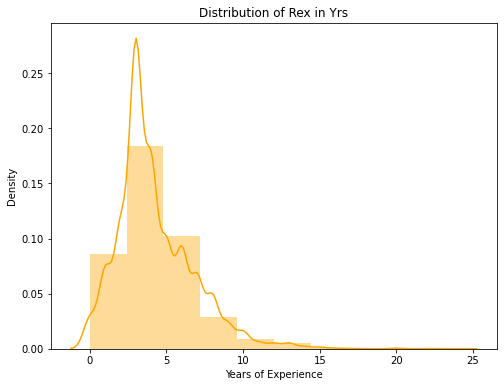

In [433]:
dist(df, 'Rex in Yrs')
plt.xlabel("Years of Experience")
plt.title("Distribution of Rex in Yrs")
plt.show()

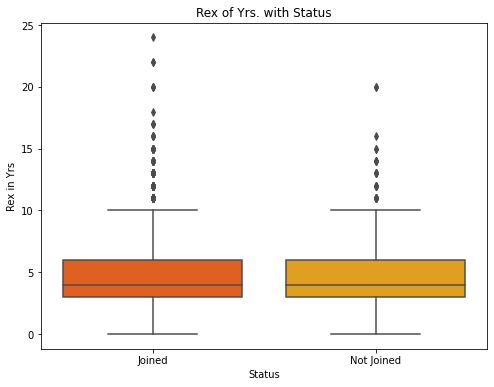

In [434]:
box('Rex in Yrs')
plt.xlabel("Status")
plt.title("Rex of Yrs. with Status")
plt.show()

* Most of the Candidates were having 0 to 8 years of experience
* We also have candidates having experience of 25 years and more
* Experience candidates are more likely to join 
* As experienced people understand the work ethics of the corporate world, they don't want to exploit them

### Analysis of 'Duration to accept offer'

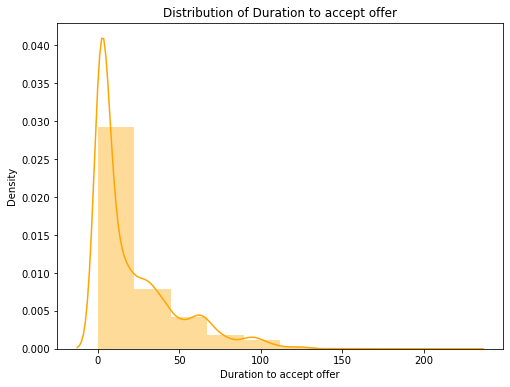

In [435]:
dist(df, 'Duration to accept offer')
plt.xlabel("Duration to accept offer")
plt.title("Distribution of Duration to accept offer")
plt.show()

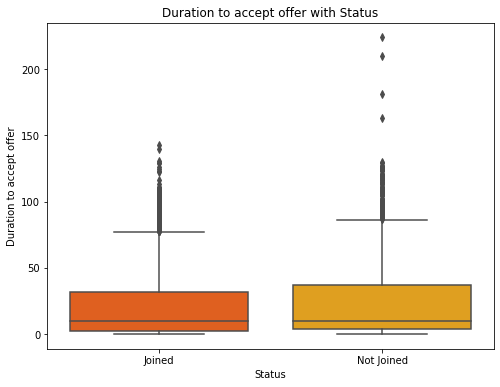

In [436]:
box('Duration to accept offer')
plt.xlabel("Status")
plt.title("Duration to accept offer with Status")
plt.show()

* The ones who did not join were given as high as 200 days to accept the offer
* The candidate must be of greater importance to the company as no company offers a time span of 8 months to accept the offer

### Analysis of 'Notice period'

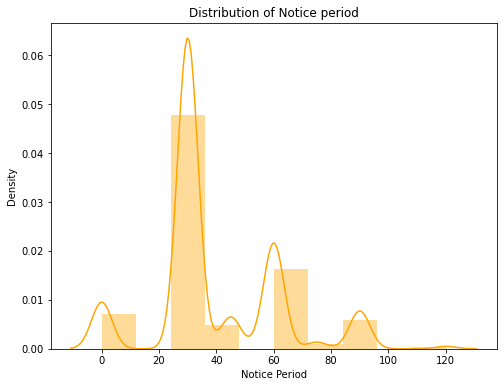

In [437]:
dist(df, 'Notice period')
plt.xlabel("Notice Period")
plt.title("Distribution of Notice period")
plt.show()

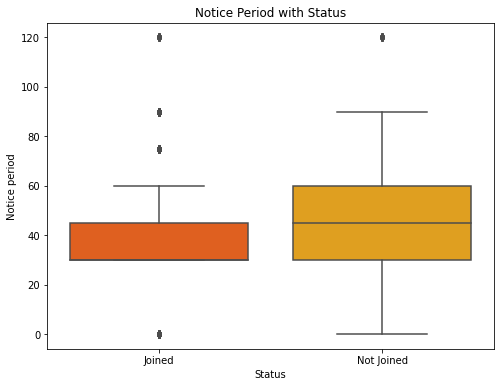

In [438]:
box('Notice period')
plt.xlabel("Status")
plt.title("Notice Period with Status")
plt.show()

* Notice Period of a company varies ranging from 0 days to 120 days
* Candidates who did not join were given more options of Notice Period starting from 0 days to about 90 days.
* Mostly who joined were not given 0 days of the notice period (except one outlier)
* This suggests that candidates who joined are less bothered about the notice period

### EDA Conclusions
* Data is imbalance thus it needs to be treated adequately. 

* Most of the candidates are Male and that is why more number of candidates who didn't join are Males

* Chennai, Bangalore and Noida have maximum candidates in comparison to other cities. This suggests that these candidates must be getting better options as Bangalore houses many firms offices.

* Almost all of the candidates were not offered any Joining Bonus.

* Almost 50% of the candidates were offered to extend the Date of Joining While the other half were not offered the same

* Most of the candidates were offered E1 band followed by E2 and E3 and E4. Since, most of them were offered E1, thus most of the candidates who did not join are also from E1. Thus, we can say that most of the candidates are freshers or having low experience level. 

* Most of the candidates were offered jobs in the Infrastructure Line of Business and Infra has twice more candidates than BFSI who joined but has almost equal numbers who did not join. This suggests that candidates are more likely to not join a BFSI firm.

* Number of candidates who did not join the company from the Direct channel is almost equal to those from Agency Channel even though candidates onboarded through Agency Channel is less. A reason behind this is, while applying through an agency, one gets multiple options of companies to apply, thus selecting the one that gives the best benefits

* The ones who were required to relocate, all of them joined which suggests they are in need of job and money are ready to work from anywhere

* Most of the candidates were of age 22 years to 35 years. It can be observed that the 60 years old candidate did not join. It seems like an error in input as generally people get retired at the age of 60 

* Most of the candidates were expecting per cent hike in CTC of about 50% while a few candidates were expecting a per cent hike more than 300% but we cannot comment on this, as they might have changed the position or department or had been assigned a managerial post

* Candidates who were expecting got a little less of per cent hike. This makes sense as candidates always aspire more than the calibre. We also see few candidates who were offered a high per cent hike in CTC which can be related to those candidates who were expecting these hikes This strongly suggests that these set of candidates had applied for a managerial level or equivalent positions

* A lot of Percent difference in Percent difference CTC is incorrect, thus we will remove them in Outlier Analysis

* Most of the Candidates were having 0 to 8 years of experience. Experience candidates are more likely to join as experienced people understand the work ethics of the corporate world, they don't want to exploit them

* The ones who did not join were given as high as 200 days to accept the offer which suggests that the candidate must be of greater importance to the company as no company offers a time span of 8 months to accept the offer

* Notice Period of a company varies ranging from 0 days to 120 days. Candidates who did not join were given more options of Notice Period starting from 0 days to about 90 days while mostly who joined were not given 0 days of the notice period (except one outlier). This suggests that candidates who joined are less bothered about the notice period

### Outlier Analysis

In [1]:
# Creating a copy of Dataframe to avoid accidental changes made to original dataframe

In [83]:
df_fin = df.copy()

#### Treating Outliers of 'Duration to accept offer'

In [84]:
print('Q1: ', df_fin['Duration to accept offer'].quantile(q = 0.25))
print('Q2: ', df_fin['Duration to accept offer'].quantile(q = 0.50))
print('Q3: ', df_fin['Duration to accept offer'].quantile(q = 0.75))

Q1:  3.0
Q2:  10.0
Q3:  33.0


In [85]:
q3_dur = df_fin['Duration to accept offer'].quantile(q = 0.75)
q1_dur = df_fin['Duration to accept offer'].quantile(q = 0.25)

iqr = q3_dur - q1_dur

out_up = q3_dur + (1.5*iqr)
out_low = q1_dur - (1.5*iqr)

df_no_ot = df_fin[(df_fin['Duration to accept offer'] > out_low) & (df_fin['Duration to accept offer'] < out_up)]

In [86]:
df_no_ot.describe().T

,count,mean,std,min,25%,50%,75%,max
SLNO,8563.00000,6035.33493,3388.99246,1.00000,3239.50000,6065.00000,8842.50000,12333.00000
Candidate Ref,8563.00000,2852273.61766,488338.51369,2109941.00000,2394782.50000,2814079.00000,3304204.50000,3836076.00000
Duration to accept offer,8563.00000,17.84970,20.05913,0.00000,2.00000,8.00000,29.00000,77.00000
Notice period,8563.00000,38.01413,21.04698,0.00000,30.00000,30.00000,60.00000,120.00000
Pecent hike expected in CTC,8563.00000,44.01472,30.06265,-68.83000,27.27000,40.00000,53.85000,359.77000
Percent hike offered in CTC,8563.00000,40.79732,36.22562,-60.00000,22.00500,36.18000,50.00000,471.43000
Percent difference CTC,8563.00000,-1.58669,19.47917,-67.27000,-8.33000,0.00000,0.00000,300.00000
Rex in Yrs,8563.00000,4.19970,2.54119,0.00000,3.00000,4.00000,6.00000,24.00000
Age,8563.00000,29.91650,4.09239,20.00000,27.00000,30.00000,34.00000,51.00000


#### Treating Outliers of 'Percent difference CTC'

In [87]:
print('Q1: ', df_no_ot['Percent difference CTC'].quantile(q = 0.25))
print('Q2: ', df_no_ot['Percent difference CTC'].quantile(q = 0.50))
print('Q3: ', df_no_ot['Percent difference CTC'].quantile(q = 0.75))

Q1:  -8.33
Q2:  0.0
Q3:  0.0


In [88]:
q3_pdiff = df_no_ot['Percent difference CTC'].quantile(q = 0.75)
q1_pdiff = df_no_ot['Percent difference CTC'].quantile(q = 0.25)

iqr = q3_pdiff - q1_pdiff

out_up = q3_pdiff + (1.5*iqr)
out_low = q1_pdiff - (1.5*iqr)

df_no_ot_2 = df_no_ot[(df_no_ot['Percent difference CTC'] > out_low) & (df_no_ot['Percent difference CTC'] < out_up)]

In [89]:
df_no_ot_2.describe().T

,count,mean,std,min,25%,50%,75%,max
SLNO,7310.00000,6040.78509,3351.32001,3.00000,3245.25000,6075.00000,8826.75000,12332.00000
Candidate Ref,7310.00000,2846508.99863,486867.61390,2109941.00000,2383206.25000,2808031.50000,3300732.75000,3835433.00000
Duration to accept offer,7310.00000,18.30903,20.31353,0.00000,3.00000,9.00000,30.00000,77.00000
Notice period,7310.00000,38.58345,21.24464,0.00000,30.00000,30.00000,60.00000,120.00000
Pecent hike expected in CTC,7310.00000,43.64106,28.13927,-45.81000,27.78000,40.19000,53.37000,327.35000
Percent hike offered in CTC,7310.00000,38.58487,26.70990,-45.81000,23.38000,35.52500,47.37000,314.53000
Percent difference CTC,7310.00000,-3.26058,6.58427,-20.77000,-7.69000,0.00000,0.00000,12.36000
Rex in Yrs,7310.00000,4.27373,2.55837,0.00000,3.00000,4.00000,6.00000,24.00000
Age,7310.00000,29.95513,4.08541,20.00000,27.00000,30.00000,34.00000,51.00000


### Cateogrical Feature Encoding

* We will exclude SLNO and Candidate Ref columns from 'X' as they contribute nothing to the prediction
* We will also exclude 'Status' from 'X' as it is the target variable 'y' 

In [236]:
X = df_no_ot_2[['DOJ Extended', 'Duration to accept offer',
       'Notice period', 'Offered band', 'Pecent hike expected in CTC',
       'Percent hike offered in CTC', 'Percent difference CTC',
       'Joining Bonus', 'Candidate relocate actual', 'Gender',
       'Candidate Source', 'Rex in Yrs', 'LOB', 'Location', 'Age']]

##### Label Encoding to 'Offered band' as it is a Ordinal Variable

In [ ]:
labenc = LabelEncoder()
X['Offered band'] = labenc.fit_transform(X['Offered band'])

##### For the remaning categorical variables, we use .get_dummies method of Pandas

In [ ]:
x = pd.get_dummies(X, drop_first = True)

##### Assigning and Encoding the target variable 

In [93]:
y = df_no_ot_2['Status'].apply(lambda x: 1 if x == 'Joined' else 0)

### Scaling Data

In [100]:
scaler = StandardScaler()

In [101]:
x_scale = scaler.fit_transform(x)

### Train Test Split

In [103]:
x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size = 0.3, random_state = 42)

### Upsampling the Data
* Since the target variable is imbalanced, the model will produce biased results, thus we need to resample the data
* Here we are using Upsampling technique SMOTE to upsample the data

In [112]:
sm = SMOTE(random_state=12)
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)

## 4. Develop a machine learning algorithms and compare different models.

##### Creating a Function for Confusion Matrix

In [439]:
def confusion_matrix(actuals, predicted):
    cm = metrics.confusion_matrix(actuals, predicted, [1,0])
    plt.figure(figsize = (8,6))
    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Joined', 'Not Joined'], yticklabels = ['Joined', 'Not Joined'])

    plt.ylabel("Actual Labels")
    plt.xlabel("Predicted Labels")

    plt.show()

### Logistic Regression

In [113]:
logreg = LogisticRegression()

In [114]:
logreg.fit(x_train_sm, y_train_sm)

LogisticRegression()

In [115]:
y_pred = logreg.predict(x_test)

In [116]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.29      0.72      0.41       386
           1       0.91      0.62      0.74      1807

    accuracy                           0.64      2193
   macro avg       0.60      0.67      0.58      2193
weighted avg       0.80      0.64      0.68      2193



##### Logistic Regressor Accuracy = 64%

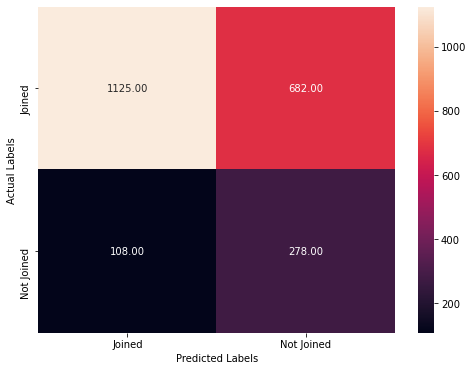

In [440]:
confusion_matrix(y_test, logreg.predict(x_test))

### Decision Tree Classifier
* We will go for Hyperparameter Tuning to select the best hyperparameter values 
* Here we will use GridSearchCV to find the best hyperparameter values

In [121]:
dtc = DecisionTreeClassifier()

In [122]:
param = [{'max_depth': list(range(10, 18)), 'max_features': list(range(0,32)), 'criterion': ['gini', 'entropy']}]

In [184]:
clf_dtc = GridSearchCV(dtc, cv = 3, param_grid = param, scoring = 'roc_auc')

In [185]:
clf_dtc.fit(x_train_sm, y_train_sm)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [10, 11, 12, 13, 14, 15, 16, 17],
                          'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13, 14, 15, 16, 17, 18, 19, 20,
                                           21, 22, 23, 24, 25, 26, 27, 28, 29, ...]}],
             scoring='roc_auc')

In [186]:
clf_dtc.best_params_

{'criterion': 'gini', 'max_depth': 10, 'max_features': 24}

In [187]:
print(metrics.classification_report(y_test, clf_dtc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.29      0.50      0.37       386
           1       0.87      0.74      0.80      1807

    accuracy                           0.70      2193
   macro avg       0.58      0.62      0.59      2193
weighted avg       0.77      0.70      0.73      2193



##### Tuned Decision Trees Classifier Accuracy = 70%

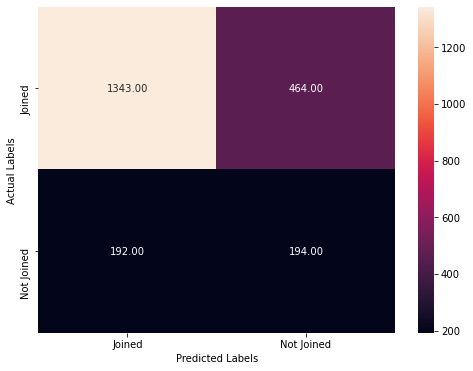

In [441]:
confusion_matrix(y_test, clf_dtc.predict(x_test))

### Random Forest Classifier
* We will go for Hyperparameter Tuning to select the best hyperparameter values 
* Here we will use GridSearchCV to find the best hyperparameter values

In [189]:
rfc = RandomForestClassifier()

In [190]:
forest_params = forest_params = [{'max_depth': list(range(10, 18)), 'max_features': list(range(0,32))}]

In [191]:
clf_rfc = GridSearchCV(rfc, cv = 3, param_grid = forest_params, scoring = 'roc_auc')

In [192]:
clf_rfc.fit(x_train_sm, y_train_sm)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 11, 12, 13, 14, 15, 16, 17],
                          'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13, 14, 15, 16, 17, 18, 19, 20,
                                           21, 22, 23, 24, 25, 26, 27, 28, 29, ...]}],
             scoring='roc_auc')

In [244]:
clf_rfc.best_params_

{'max_depth': 17, 'max_features': 2}

In [193]:
print(metrics.classification_report(y_test, clf_rfc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.45      0.38      0.41       386
           1       0.87      0.90      0.89      1807

    accuracy                           0.81      2193
   macro avg       0.66      0.64      0.65      2193
weighted avg       0.80      0.81      0.80      2193



##### Tuned Random Forest Classifier Accuracy = 81%

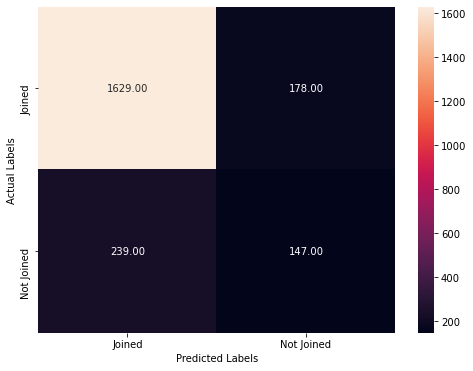

In [442]:
confusion_matrix(y_test, clf_rfc.predict(x_test))

### K-Nearest Neighbor Classifier
* We will go for Hyperparameter Tuning to select the best hyperparameter values 
* Here we will use GridSearchCV to find the best hyperparameter values

In [197]:
knn = KNeighborsClassifier()

In [198]:
knn_params = [{'n_neighbors': range(5,10),'metric': ['canberra', 'euclidean', 'minkowski']}]

In [199]:
clf_knn = GridSearchCV(knn, cv = 3, param_grid = knn_params, scoring = 'roc_auc')

In [200]:
clf_knn.fit(x_train_sm, y_train_sm)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid=[{'metric': ['canberra', 'euclidean', 'minkowski'],
                          'n_neighbors': range(5, 10)}],
             scoring='roc_auc')

In [245]:
clf_knn.best_params_

{'metric': 'canberra', 'n_neighbors': 5}

In [201]:
print(metrics.classification_report(y_test, clf_knn.predict(x_test)))

              precision    recall  f1-score   support

           0       0.34      0.51      0.40       386
           1       0.88      0.79      0.83      1807

    accuracy                           0.74      2193
   macro avg       0.61      0.65      0.62      2193
weighted avg       0.79      0.74      0.76      2193



##### Tuned KNN Classifier Accuracy = 74%

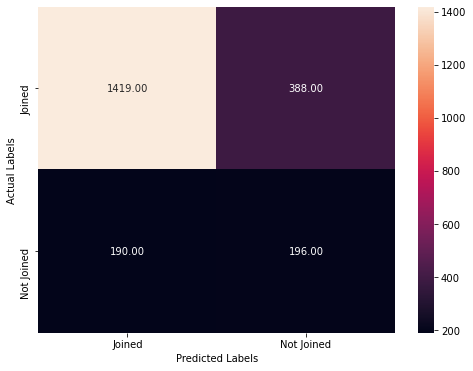

In [443]:
confusion_matrix(y_test, clf_knn.predict(x_test))

### Performance Comparision

### 1. Accuracy Scores

In [258]:
df_acc = pd.DataFrame({'Estimators': ['Logistic Regressor', 'Decision Tree Classifier', 'Random Forest Classifier', 
                                     'K-Nearest Neighbor Classifier'],
                     'Accuracy':['{0:.2f}'.format(metrics.accuracy_score(y_test, logreg.predict(x_test))), 
                                 '{0:.2f}'.format(metrics.accuracy_score(y_test, clf_dtc.predict(x_test))),
                                '{0:.2f}'.format(metrics.accuracy_score(y_test, clf_rfc.predict(x_test))),
                                '{0:.2f}'.format(metrics.accuracy_score(y_test, clf_knn.predict(x_test)))]})

In [260]:
df_acc

,Estimators,Accuracy
0,Logistic Regressor,0.64
1,Decision Tree Classifier,0.70
2,Random Forest Classifier,0.81
3,K-Nearest Neighbor Classifier,0.74


### 2. ROC - AUC Score

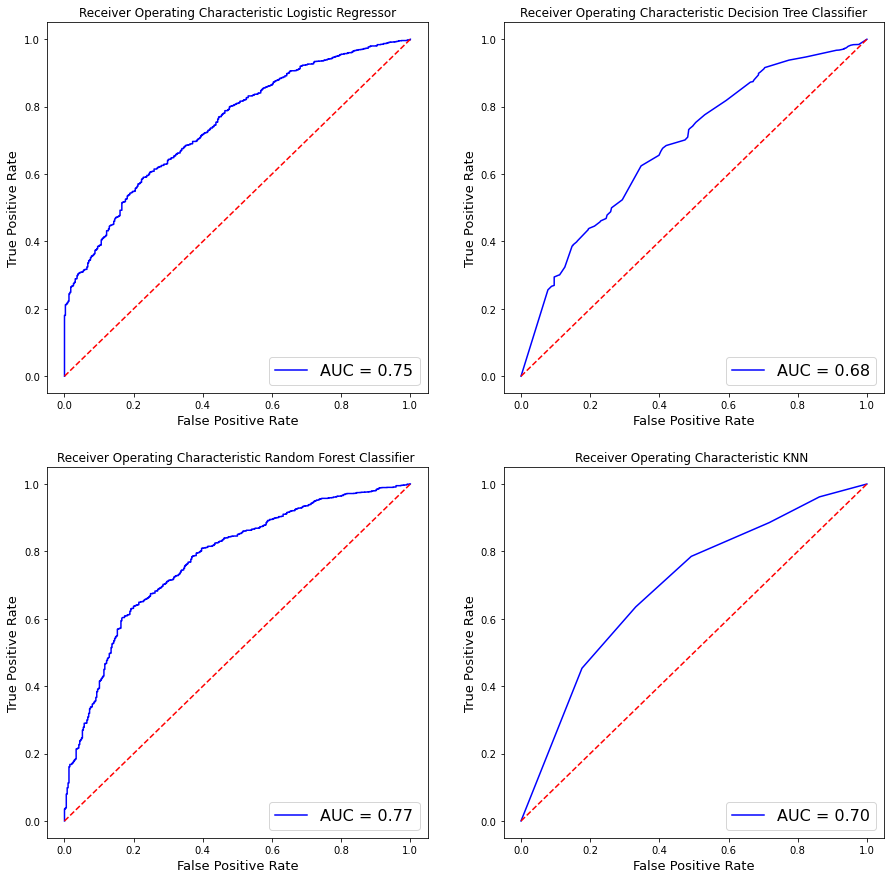

In [277]:
fig, ax_arr = plt.subplots(nrows = 2, ncols = 2, figsize = (15,15))

#LOGREG-----------------------------------------
probs = logreg.predict_proba(x_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

ax_arr[0, 0].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[0, 0].plot([0, 1], [0, 1],'r--')
ax_arr[0, 0].set_title('Receiver Operating Characteristic Logistic Regressor')
ax_arr[0, 0].set_ylabel('True Positive Rate',fontsize=13)
ax_arr[0, 0].set_xlabel('False Positive Rate',fontsize=13)
ax_arr[0, 0].legend(loc = 'lower right', prop={'size': 16})

#DECISION TREE ---------------------
probs = clf_dtc.predict_proba(x_test)
preds = probs[:,1]
fprdtree, tprdtree, thresholddtree = metrics.roc_curve(y_test, preds)
roc_aucdtree = metrics.auc(fprdtree, tprdtree)

ax_arr[0, 1].plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.2f' % roc_aucdtree)
ax_arr[0, 1].plot([0, 1], [0, 1],'r--')
ax_arr[0, 1].set_title('Receiver Operating Characteristic Decision Tree Classifier')
ax_arr[0, 1].set_ylabel('True Positive Rate',fontsize=13)
ax_arr[0, 1].set_xlabel('False Positive Rate',fontsize=13)
ax_arr[0, 1].legend(loc = 'lower right', prop={'size': 16})

#RANDOM FOREST ---------------------
probs = clf_rfc.predict_proba(x_test)
preds = probs[:,1]
fprrfc, tprrfc, threshodrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax_arr[1, 0].plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax_arr[1, 0].plot([0, 1], [0, 1],'r--')
ax_arr[1, 0].set_title('Receiver Operating Characteristic Random Forest Classifier ')
ax_arr[1, 0].set_ylabel('True Positive Rate',fontsize=13)
ax_arr[1, 0].set_xlabel('False Positive Rate',fontsize=13)
ax_arr[1, 0].legend(loc = 'lower right', prop={'size': 16})

#KNN------------------------------------
probs = clf_knn.predict_proba(x_test)
preds = probs[:,1]
fprknn, tprknn, thresholdknn = metrics.roc_curve(y_test, preds)
roc_aucknn = metrics.auc(fprknn, tprknn)

ax_arr[1, 1].plot(fprknn, tprknn, 'b', label = 'AUC = %0.2f' % roc_aucknn)
ax_arr[1, 1].plot([0, 1], [0, 1],'r--')
ax_arr[1, 1].set_title('Receiver Operating Characteristic KNN ')
ax_arr[1, 1].set_ylabel('True Positive Rate',fontsize=13)
ax_arr[1, 1].set_xlabel('False Positive Rate',fontsize=13)
ax_arr[1, 1].legend(loc = 'lower right', prop={'size': 16})





plt.show()

### Based on the Accuracy Score and ROC - AUC Values, we can conclude that out of four estimators, Random Forest performed well for the given dataset.

### Predictive Analysis Conclusions

* For the given Dataset, the Random Forest Classifier for the given hyperparameters performed well than others while Logistic Regressor performed worst.
* This result is based on Accuracy Score and ROC - AUC Score
* Since the target variable imbalanced, We can try resampling by downsampling the records and can build models
* We can look for more performance metrics to improve the model performance and selecting the best one.
* During Outlier Analysis, we removed outliers of 'Percent difference CTC' and 'Duration to accept offer'
* We can also look for outliers in 'Percent offered in CTC' and 'Percent expected in CTC' with caution as we may lose data. We can keep alpha = 0.01 for this case
* Trying different random states can change the results slightly
* We can also perform more rigorous Hyperparameter Tuning to get a more precise model, but this will incur more cost